**Grader - Please note the starter notebook for this activity has been changed by the instructor for this class. 

In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=b6eaf1e124b0079aa59be10268791ecb7b6f3c35f74ebe9dd221705bf74128c8
  Stored in directory: /Users/dvadakan/Library/Caches/pip/wheels/23/9d/42/5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c
Successfully built sklearn


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [18]:
!pip install seaborn

     |████████████████████████████████| 285 kB 4.8 MB/s eta 0:00:01


In [176]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC 
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

In [145]:
exoplanet_df = pd.read_csv("exoplanet_data.csv")

# Read the CSV and Perform Basic Data Cleaning

In [146]:
# Exploratory data analysis
exoplanet_df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [147]:
exoplanet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6991 entries, 0 to 6990
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    6991 non-null   object 
 1   koi_fpflag_nt      6991 non-null   int64  
 2   koi_fpflag_ss      6991 non-null   int64  
 3   koi_fpflag_co      6991 non-null   int64  
 4   koi_fpflag_ec      6991 non-null   int64  
 5   koi_period         6991 non-null   float64
 6   koi_period_err1    6991 non-null   float64
 7   koi_period_err2    6991 non-null   float64
 8   koi_time0bk        6991 non-null   float64
 9   koi_time0bk_err1   6991 non-null   float64
 10  koi_time0bk_err2   6991 non-null   float64
 11  koi_impact         6991 non-null   float64
 12  koi_impact_err1    6991 non-null   float64
 13  koi_impact_err2    6991 non-null   float64
 14  koi_duration       6991 non-null   float64
 15  koi_duration_err1  6991 non-null   float64
 16  koi_duration_err2  6991 

In [148]:
# Assign X and y
X = exoplanet_df.drop("koi_disposition", axis=1)
y_original = exoplanet_df["koi_disposition"]

# Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_original)
y = label_encoder.transform(y_original)
print(X.shape, y.shape)
print(y_original, y)

(6991, 40) (6991,)
0            CONFIRMED
1       FALSE POSITIVE
2       FALSE POSITIVE
3            CONFIRMED
4            CONFIRMED
             ...      
6986    FALSE POSITIVE
6987    FALSE POSITIVE
6988         CANDIDATE
6989    FALSE POSITIVE
6990    FALSE POSITIVE
Name: koi_disposition, Length: 6991, dtype: object [1 2 2 ... 0 2 2]


array([[<AxesSubplot:title={'center':'koi_fpflag_nt'}>,
        <AxesSubplot:title={'center':'koi_fpflag_ss'}>,
        <AxesSubplot:title={'center':'koi_fpflag_co'}>,
        <AxesSubplot:title={'center':'koi_fpflag_ec'}>,
        <AxesSubplot:title={'center':'koi_period'}>,
        <AxesSubplot:title={'center':'koi_period_err1'}>],
       [<AxesSubplot:title={'center':'koi_period_err2'}>,
        <AxesSubplot:title={'center':'koi_time0bk'}>,
        <AxesSubplot:title={'center':'koi_time0bk_err1'}>,
        <AxesSubplot:title={'center':'koi_time0bk_err2'}>,
        <AxesSubplot:title={'center':'koi_impact'}>,
        <AxesSubplot:title={'center':'koi_impact_err1'}>],
       [<AxesSubplot:title={'center':'koi_impact_err2'}>,
        <AxesSubplot:title={'center':'koi_duration'}>,
        <AxesSubplot:title={'center':'koi_duration_err1'}>,
        <AxesSubplot:title={'center':'koi_duration_err2'}>,
        <AxesSubplot:title={'center':'koi_depth'}>,
        <AxesSubplot:title={'center':

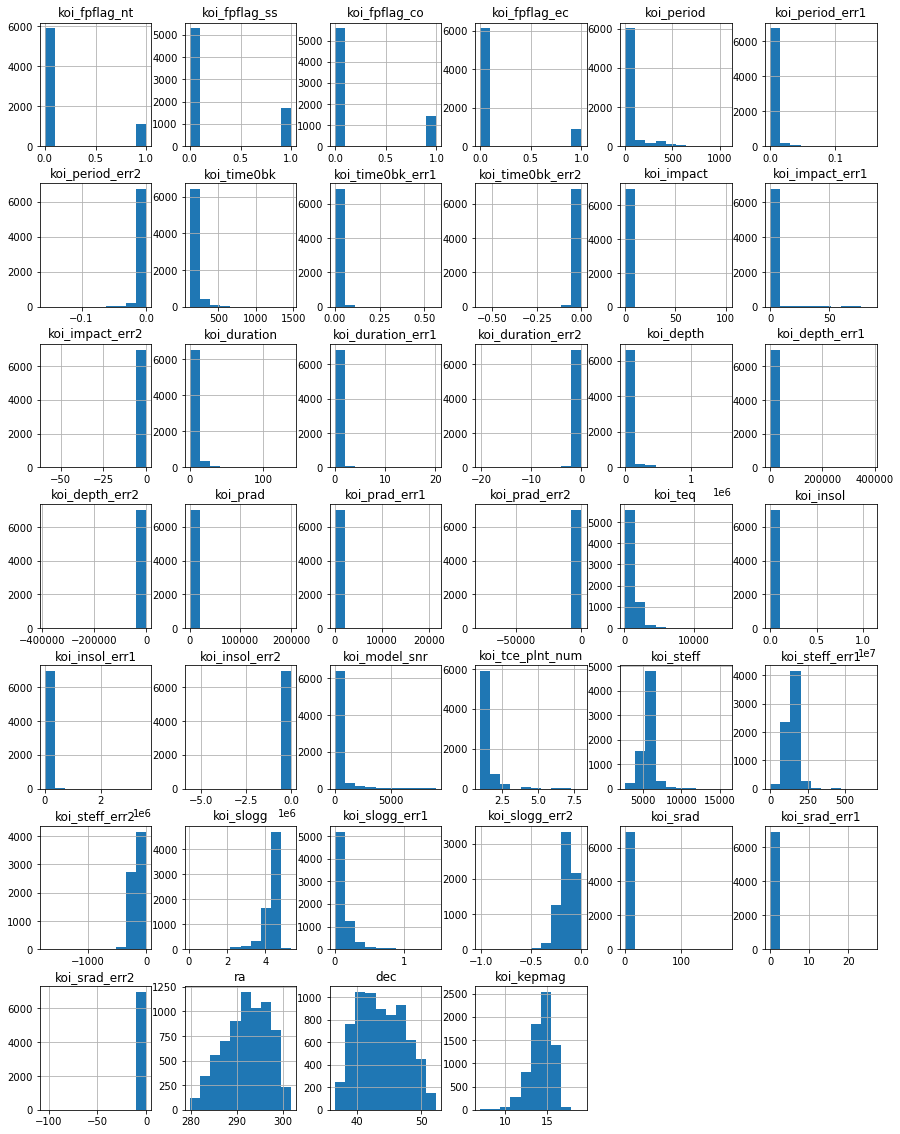

In [149]:
X.hist(figsize=(15,20))

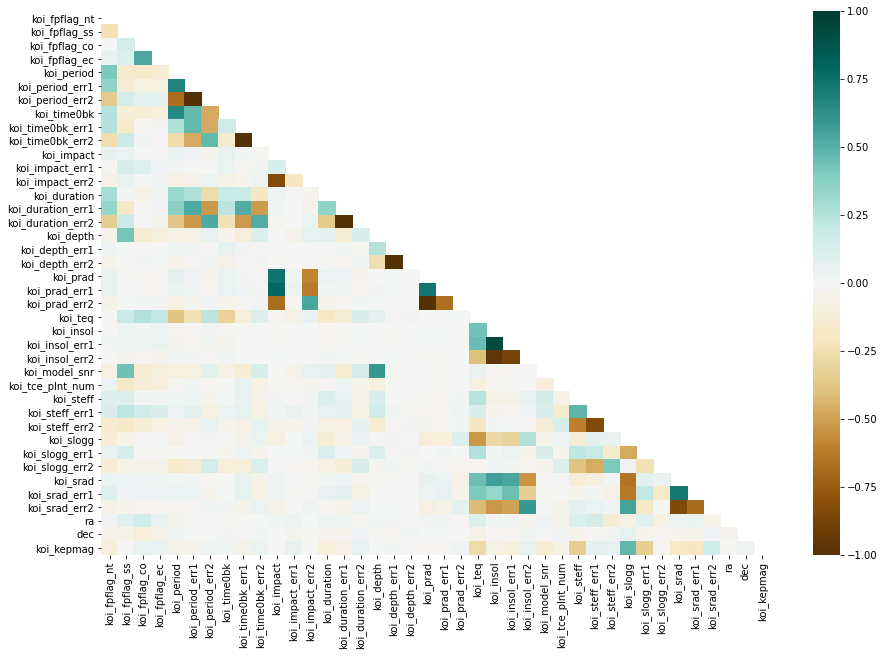

In [150]:
plt.figure(figsize=(15,10))
mask = np.triu(np.ones_like(X.corr(), dtype=np.bool))
heatmap = sns.heatmap(X.corr(), mask=mask, vmin=-1, vmax=1, cmap="BrBG")

In [151]:
#rfg_model = RandomForestRegressor().fit(X, y)

rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X, y)

# importance_df = pd.DataFrame({"feature": X.columns, 
#                               "RFG Importance": rfg_model.feature_importances_, 
#                               "RFC Importance": rf.feature_importances_,
#                             "Avg": (rfg_model.feature_importances_+rf.feature_importances_)/2})
# importance_df.sort_values("Avg", ascending=False)

importance_df = pd.DataFrame({"feature": X.columns, 
                              "Importance": rf.feature_importances_})
importance_df.sort_values("Importance", ascending=False)

,feature,Importance
2,koi_fpflag_co,0.111796
0,koi_fpflag_nt,0.101197
1,koi_fpflag_ss,0.072042
26,koi_model_snr,0.052724
19,koi_prad,0.045216
3,koi_fpflag_ec,0.036592
20,koi_prad_err1,0.035620
21,koi_prad_err2,0.034670
15,koi_duration_err2,0.034046
14,koi_duration_err1,0.030729


In [152]:
# Inspect rows and columns with missing data and decide what to do with them

# Drop rows/columns with missing data or you can replace missing data

# Select your features (columns)

In [153]:
# Drop *unimportant, irrelevant, or duplicate columns
exoplanet_df = exoplanet_df.drop(columns=["koi_tce_plnt_num", 
                                          "koi_slogg_err1", 
                                          "koi_srad_err2",
                                          "koi_steff", 
                                          "koi_slogg", 
                                          "koi_srad", 
                                          "koi_slogg_err2", 
                                          "koi_impact_err2", 
                                          "koi_kepmag", 
                                          "dec", 
                                          "koi_impact_err1", 
                                          "ra", 
                                          "koi_srad_err1", 
                                          "koi_depth_err1", 
                                          "koi_insol_err2", 
                                          "koi_depth_err2", 
                                          "koi_time0bk", 
                                          "koi_insol"], axis=1)

In [154]:
# Set your y to be koi-disposition and your X to be all other columns
X = exoplanet_df.drop("koi_disposition", axis=1)
y_original = exoplanet_df["koi_disposition"]

# Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_original)
y = label_encoder.transform(y_original)
print(X.shape, y.shape)
print(y_original, y)

target_names = ["CANDIDATE", "CONFIRMED", "FALSE POSITIVE"]

(6991, 22) (6991,)
0            CONFIRMED
1       FALSE POSITIVE
2       FALSE POSITIVE
3            CONFIRMED
4            CONFIRMED
             ...      
6986    FALSE POSITIVE
6987    FALSE POSITIVE
6988         CANDIDATE
6989    FALSE POSITIVE
6990    FALSE POSITIVE
Name: koi_disposition, Length: 6991, dtype: object [1 2 2 ... 0 2 2]


# Create a Train Test Split


In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Pre-processing

In [156]:
# Scale your data using appropriate scaler
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train various  models



## Model 1

In [159]:
# Instantiate model 1 (e.g., SVC 'linear')
model = SVC()
#model.fit(X_train_scaled, y_train)

# Fit model using GridSearchCV if it makes sense
param_grid = {'C': [1, 5, 10, 50],
              'kernel': ('linear', 'rbf')}
grid = GridSearchCV(model, param_grid, verbose=3)
grid.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] C=1, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................. C=1, kernel=linear, score=0.894, total=   0.3s
[CV] C=1, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .................. C=1, kernel=linear, score=0.882, total=   0.3s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.885, total=   0.2s
[CV] C=1, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV] .................. C=1, kernel=linear, score=0.873, total=   0.2s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.880, total=   0.2s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.889, total=   0.2s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.869, total=   0.2s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.879, total=   0.2s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.864, total=   0.2s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.877, total=   0.2s
[CV] C=5, kernel=linear ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   19.6s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 5, 10, 50], 'kernel': ('linear', 'rbf')},
             verbose=3)

In [162]:
# Look at model evalauation metrics - there are more options than just score
print('Test Acc: %.3f' % grid.score(X_test_scaled, y_test))
predictions = grid.predict(X_test_scaled)
print(classification_report(y_test, predictions,
                            target_names=target_names))
print(grid.best_params_)


Test Acc: 0.887
                precision    recall  f1-score   support

     CANDIDATE       0.81      0.71      0.76       411
     CONFIRMED       0.78      0.85      0.81       484
FALSE POSITIVE       0.98      1.00      0.99       853

      accuracy                           0.89      1748
     macro avg       0.86      0.85      0.85      1748
  weighted avg       0.89      0.89      0.89      1748

{'C': 50, 'kernel': 'linear'}


## Model 2

k: 1, Train/Test Score: 1.000/0.843
k: 3, Train/Test Score: 0.922/0.864
k: 5, Train/Test Score: 0.907/0.872
k: 7, Train/Test Score: 0.897/0.871
k: 9, Train/Test Score: 0.891/0.872
k: 11, Train/Test Score: 0.889/0.871
k: 13, Train/Test Score: 0.887/0.875
k: 15, Train/Test Score: 0.884/0.871


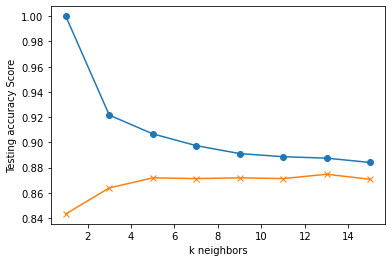

In [173]:
# Instantiate model 2 (e.g., random forest model)
train_scores = []
test_scores = []
for k in range(1, 16, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 16, 2), train_scores, marker='o')
plt.plot(range(1, 16, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

# Fit model using GridSearchCV if it makes sense



In [174]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.872


In [175]:
# Look at model evalauation metrics - there are more options than just score
predictions = knn.predict(X_test_scaled)
print(classification_report(y_test, predictions,
                            target_names=target_names))

                precision    recall  f1-score   support

     CANDIDATE       0.77      0.69      0.73       411
     CONFIRMED       0.77      0.82      0.79       484
FALSE POSITIVE       0.97      0.99      0.98       853

      accuracy                           0.87      1748
     macro avg       0.84      0.83      0.83      1748
  weighted avg       0.87      0.87      0.87      1748



## Feel free to test more models

In [179]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)
predictions = clf.predict(X_test_scaled)
print(classification_report(y_test, predictions,
                            target_names=target_names))

                precision    recall  f1-score   support

     CANDIDATE       0.69      0.72      0.70       411
     CONFIRMED       0.74      0.71      0.72       484
FALSE POSITIVE       0.98      0.98      0.98       853

      accuracy                           0.84      1748
     macro avg       0.80      0.80      0.80      1748
  weighted avg       0.85      0.84      0.84      1748



In [185]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)
predictions = rf.predict(X_test_scaled)
print(classification_report(y_test, predictions,
                            target_names=target_names))

                precision    recall  f1-score   support

     CANDIDATE       0.83      0.77      0.80       411
     CONFIRMED       0.82      0.85      0.84       484
FALSE POSITIVE       0.98      1.00      0.99       853

      accuracy                           0.90      1748
     macro avg       0.88      0.87      0.87      1748
  weighted avg       0.90      0.90      0.90      1748



# Find best model and safe

In [ ]:
# Compare metrics and determine best model


In [ ]:
# Save best model - replace "your_model" with your model variable

import joblib
filename = 'exoplanet_model.sav'
joblib.dump(your_model, filename)